<p class="pull-left">
Analytics Computing Report 7
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Jenith Suvagia 2022
</ul>
</div>

## <center>      Module 9 Report - Movies, Movies & Movies</center>
    
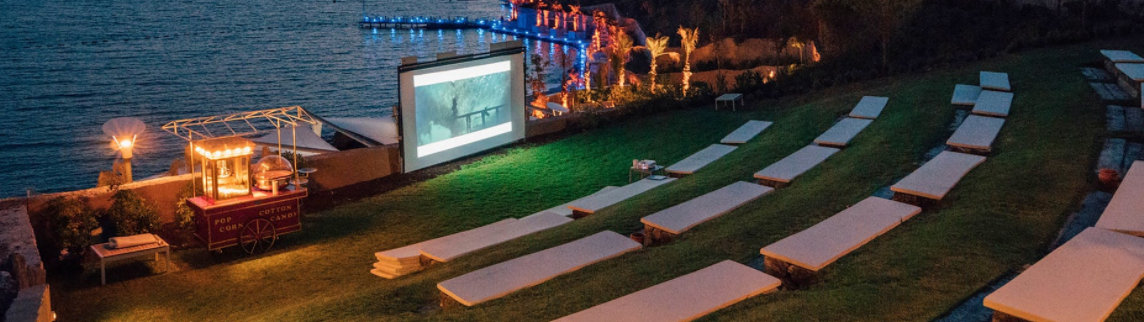
    
    
----------------

### Jenith Mayurbhai Suvagia
### Movie Night

----------------

# 1) Objective 
> * Here got a dataframe of the students with their movie prefrence and their rating of the movies genre and their characteristics. I have to evaluate the dataframe and explore the dataframe and clean the dataframe to do the further evalution.
> * Then I have to clean the dataframe with null values and remove the unwanted rows and columns of the dataframe. Then visualize the clustering of the subset of the dataframe the I select with the help of dendogram.
> * Then I have to analysis the number of the formed in the dendogram and perform the Kmeans in the dataframe to create the cluster in the scatter plot. Then use the sklearn.cluster library to create cluster for unsupervised k-means(). Then create a model to predict the coupens of the movie for the new students with the help of their characteristics.


--------------

* Here we import all the libraries which will be used in this report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as sm
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

----------
# 2) Data Exploration and Cleaning
-------

* Here we `.read_excel()` to import excel file in the dataframe mov.

In [3]:
mov = pd.read_excel("Report 9.xlsx", skiprows = 5)

* Here we used `.head()` function to observe the first 5 columns of the dataframe.

In [4]:
mov.head()

,Student Name,Student ID,Score (%),Score (#),"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?,Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow
0,NaN,NaN,NaN,16.0,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point,1 point
1,Akbar,-,0.0,0.0,9.9,9.9,9.8,8.5,5.4,7.9,8.9,9.9,6.9,10,9.5,3.8,7.4,D. 4) Three to four movies a week,D. Spiderman,Sociable\nFriendly\nchatty\nloyal\nHappy
2,Ali,-,0.0,0.0,6,6,6,5,7,3,10,3,7,4,5,9,7,B. 2) One movie a week,A. Star Wars\nE. Mulan,"Motivated, Reliable, Intuitive, Independent, A..."
3,Anh T,-,0.0,0.0,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,D. 4) Three to four movies a week,D. Spiderman,- Quiet\n- Introverted\n- Happy\n- Slow\n- Funny
4,Brandon Inoshita,-,0.0,0.0,8.9,9.1,5.6,6.1,1.2,9.3,9.0,6.2,6.3,5.2,8.3,7.2,9.7,C. 3) Two movies a week,A. Star Wars,-Slow\n-Anxious\n-Awkward\n-Happy\n-Diligent


* Here we used `.rename()` function to rename the name of the columns of the dataframe for the better visualization.

In [5]:
# Renaming the columns
mov = mov.rename(columns = {'Student Name':'Name', 'Student ID':'ID', 'Score (%)':'Score', "Score (#)":'Score#', "Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)":'Action',
                       'Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)':'Adventure',
                       'Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)': 'Comedy',
                       'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)': 'Crime',
                       'Using a scale 1 to 10, how much do you like drama movies?':'Drama',
                       'Using a scale 1 to 10, how much do you like fantasy movies?': 'Fantasy',
                       'Using a scale 1 to 10, how much do you like science fiction movies?': 'Science_Fiction',
                       'Using a scale 1 to 10, how much do you like horror movies?':'Horror',
                       'Using a scale 1 to 10, how much do you like mystery movies?': 'Mystery',
                       'Using a scale 1 to 10, how much do you like romance movies?':'Romance',
                       'Using a scale 1 to 10, how much do you like thriller movies?': 'Thriller',
                       'Using a scale 1 to 10, how much do you like documentary movies?':'Documentary',
                       'Using a scale 1 to 10, how much do you like animated movies?':'Animated',
                       'On average, how many movies you watch on a single week':'MPW',
                       "Which of the following movies you'd say is your preferred?":'Movie_preferred',
                       "Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow":'Adjective'})

* Here we used *del* and `.drop()` functions to remove columns and rows of the dataframe respectively.

In [6]:
# Removing the unwanted rows and columns of the Dataframe.
del mov['ID']
del mov['Score']
del mov['Score#']
mov = mov.drop(labels = 0, axis = 0)
mov = mov.drop(labels = 15, axis = 0)
mov = mov.drop(labels = 34, axis = 0)
mov = mov.drop(labels = 39, axis = 0)
mov = mov.drop(labels = 41, axis = 0)
mov = mov.drop(labels = 42, axis = 0)
mov = mov.drop(labels = 43, axis = 0)


* Here `astype` function to the data type of the columns of the dataframe.

In [7]:
# Converting the data type of columns with integers from object to float values.
mov = mov.astype({'Action':'float', 'Adventure':'float','Comedy':'float','Crime':'float','Drama':'float',
                 'Fantasy':'float', 'Science_Fiction':'float', 'Horror':'float', 'Mystery':'float', 'Romance':'float',
                 'Thriller':'float', 'Documentary':'float', 'Animated':'float'})

* Here we used `.str.split` function to sort the movies watched per week to remove unwanted data in that column.

In [8]:
movc = mov["MPW"].str.split(" movie", n = 1, expand = True)
mov.drop(columns = "MPW", inplace = True)
mov["MPW"] = movc[0]
num =  mov["MPW"].str.split(")", n = 1, expand = True)
mov.drop(columns = "MPW", inplace = True)
mov["MPW"] = num[1]

In [9]:
movp = mov["Movie_preferred"].str.split(". ", n = 1, expand = True)
mov.drop(columns = "Movie_preferred", inplace = True)
mov["Movie_preferred"]=  movp[1]
movp1 = mov["Movie_preferred"].str.split("\n", n = 1, expand = True)
mov.drop(columns = "Movie_preferred", inplace = True)
mov["Movie_preferred"]=  movp1[0]
# Setting column Name as Index 
mov = mov.set_index("Name")

In [10]:
mov['Adjective'] = mov['Adjective'].str.replace(r'\n', ', ', regex = True)
mov['Adjective'] = mov['Adjective'].str.replace(r'-', ', ', regex = True)

* Here we found that in a cell with the use of `.iloc` function there is a unwanted data which need to be clean

In [11]:
mov.iloc[24, 13]

"Capable : I am ambitious and driven. I thrive on challenge and constantly set goals for myself, so I have something to strive towards. I am not comfortable with settling, and I am always looking for an opportunity to do better and achieve greatness., , Friendly : I would describe myself as caring, loving, friendly, trustworthy, helpful and positive girl. Amiable — He's friendly and nice. Anything that has a circular pattern., , Happy : I used to despair about not having the capacity for such due to certain unavoidable circumstances, upon regaining it, I give it a wayward glance from time to time, wondering if it will remain steady. I was raised to be optimistic with lots of love so it’s not surprising I am now a happy and loving person. As the days go by I know I can hold onto this and make the most of it., , Sociable : I'm still an introvert like I was when I was younger. I don't generally socialize much. But yes, in the past few months, I've started to socialize a bit, because I'm t

* Here we reduce the above data of that cell to important one.

In [12]:
mov["Adjective"] = mov["Adjective"].apply(lambda x: x.replace("Capable : I am ambitious and driven. I thrive on challenge and constantly set goals for myself, so I have something to strive towards. I am not comfortable with settling, and I am always looking for an opportunity to do better and achieve greatness., , Friendly : I would describe myself as caring, loving, friendly, trustworthy, helpful and positive girl. Amiable — He's friendly and nice. Anything that has a circular pattern., , Happy : I used to despair about not having the capacity for such due to certain unavoidable circumstances, upon regaining it, I give it a wayward glance from time to time, wondering if it will remain steady. I was raised to be optimistic with lots of love so it’s not surprising I am now a happy and loving person. As the days go by I know I can hold onto this and make the most of it., , Sociable : I'm still an introvert like I was when I was younger. I don't generally socialize much. But yes, in the past few months, I've started to socialize a bit, because I'm told that, after entering college, I'll have to talk to strangers. I'm am very shy and introvert person in my school. I don't know how will I manage in the college. I wish someone really teaches me some good socialising skills., , Slow : I'm lslow when it comes to eating because I like to enjoy my food like a cow and talk to other poeple about everything but somethings when I try to do very quickly then I end up messing up things so I feel it's good to go slomo.", "Capable, Friendly, Happy, Sociable, Slow"))

* Here we explore the data type of the dataframe of each columns.

In [13]:
mov.dtypes

Action             float64
Adventure          float64
Comedy             float64
Crime              float64
Drama              float64
Fantasy            float64
Science_Fiction    float64
Horror             float64
Mystery            float64
Romance            float64
Thriller           float64
Documentary        float64
Animated           float64
Adjective           object
MPW                 object
Movie_preferred     object
dtype: object

* Here we used the `.shape` function to find the shape of the dataframe after cleaning. We found out there are 37 rows and 16 columns.

In [14]:
mov.shape

(37, 16)

* Here we used `isna().any()` function to find if there is any null values in the dataframe.

In [15]:
mov.isna().any()

Action             False
Adventure          False
Comedy             False
Crime              False
Drama              False
Fantasy            False
Science_Fiction    False
Horror             False
Mystery            False
Romance            False
Thriller           False
Documentary        False
Animated           False
Adjective          False
MPW                False
Movie_preferred    False
dtype: bool

* Here we used `.columns` function to get the names of the columns of the dataframe.

In [16]:
mov.columns

Index(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy',
       'Science_Fiction', 'Horror', 'Mystery', 'Romance', 'Thriller',
       'Documentary', 'Animated', 'Adjective', 'MPW', 'Movie_preferred'],
      dtype='object')

--------------------
# 3) Dindogram
--------------------

### A) Dindogram 1

* Here I created a subset of the dataframe to plot a dendogram 

In [17]:
din1 = mov[["Action", "Adventure", "Crime", "Horror", "Thriller"]]

* Here we used `dendrogram()` function to create a dendogram of columns "Action", "Adventure", "Crime", "Horror", "Thriller".

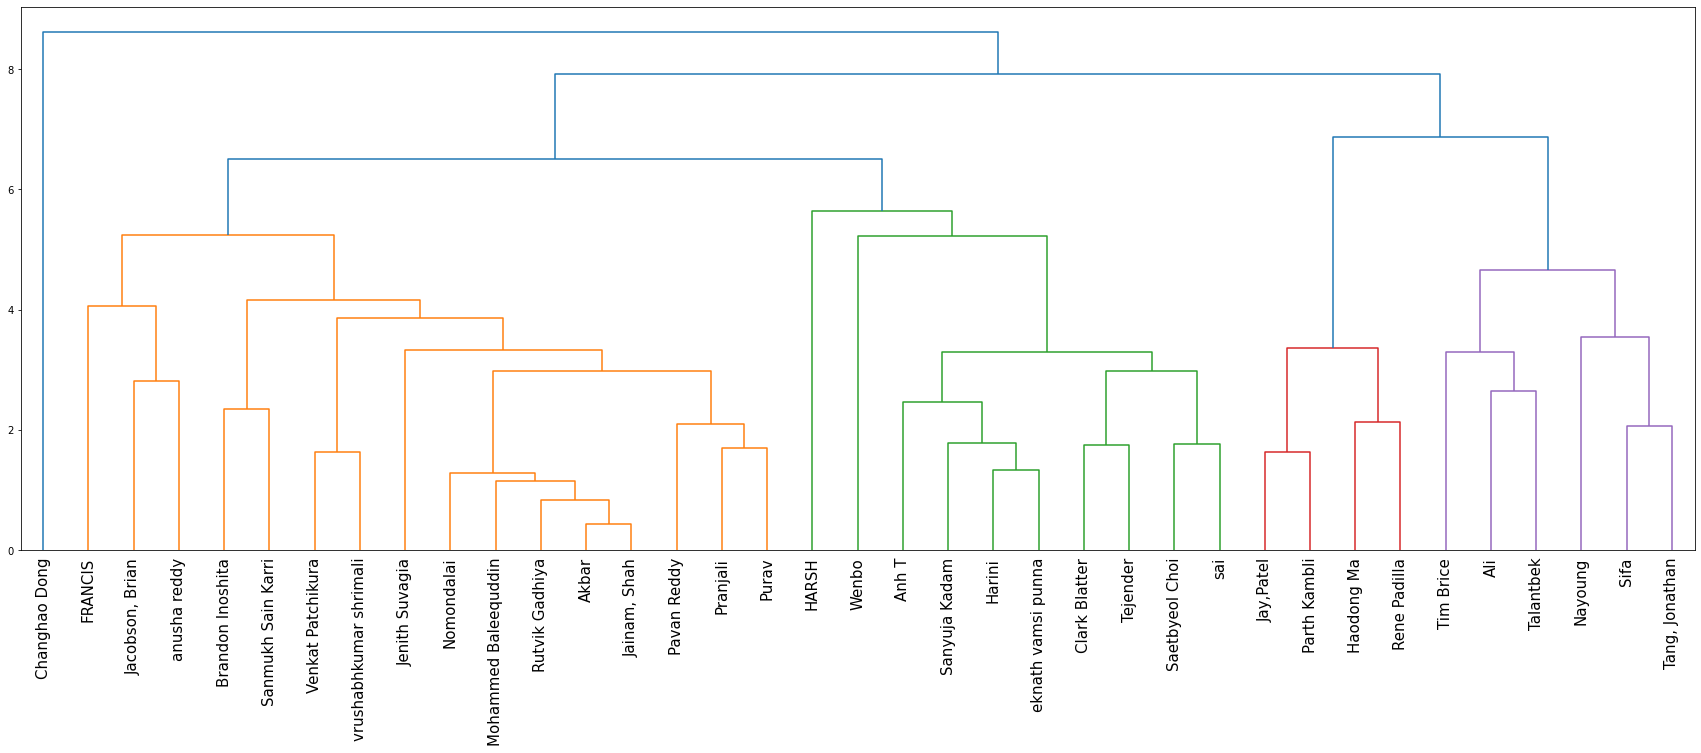

In [18]:
Z = linkage(din1, 'average')
plt.figure(figsize = (30, 10))
D = dendrogram(Z = Z, orientation = "top", leaf_rotation = 90, leaf_font_size = 15, labels = din1.index)

* Here we can see he 4 cluster in the subset of the dataframe above.
----------
* Here we created two more dendograms of remaining columns to observe the cluster created.

### B) Dendogram 2

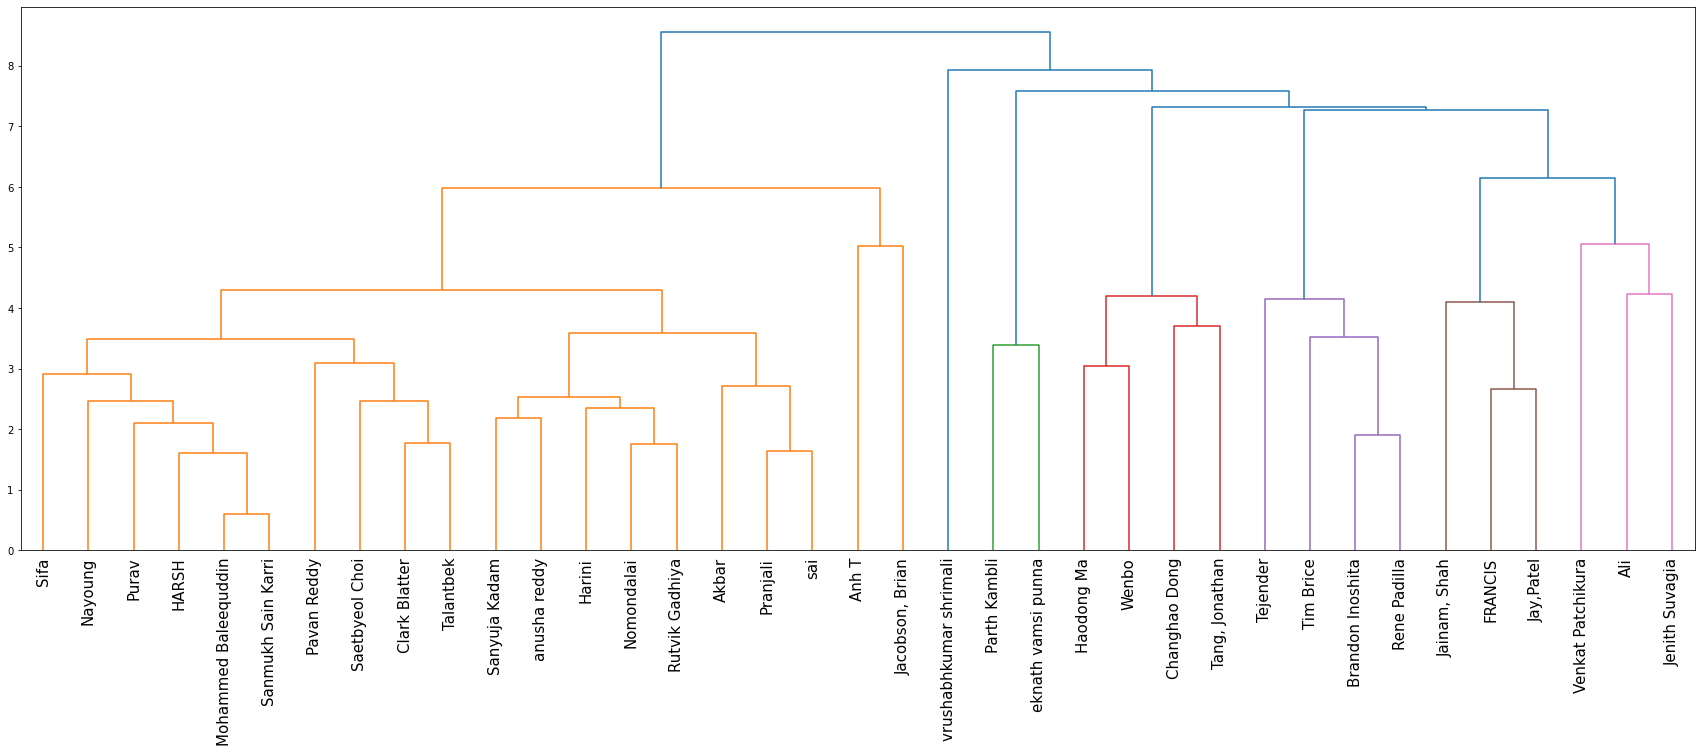

In [19]:
din2 = mov[["Comedy", "Drama", "Fantasy", "Science_Fiction", "Romance"]]
Z = linkage(din2, 'average')
plt.figure(figsize = (30, 10))
D = dendrogram(Z = Z, orientation = "top", leaf_rotation = 90, leaf_font_size = 15, labels = din2.index)

### C) Dendogram 3

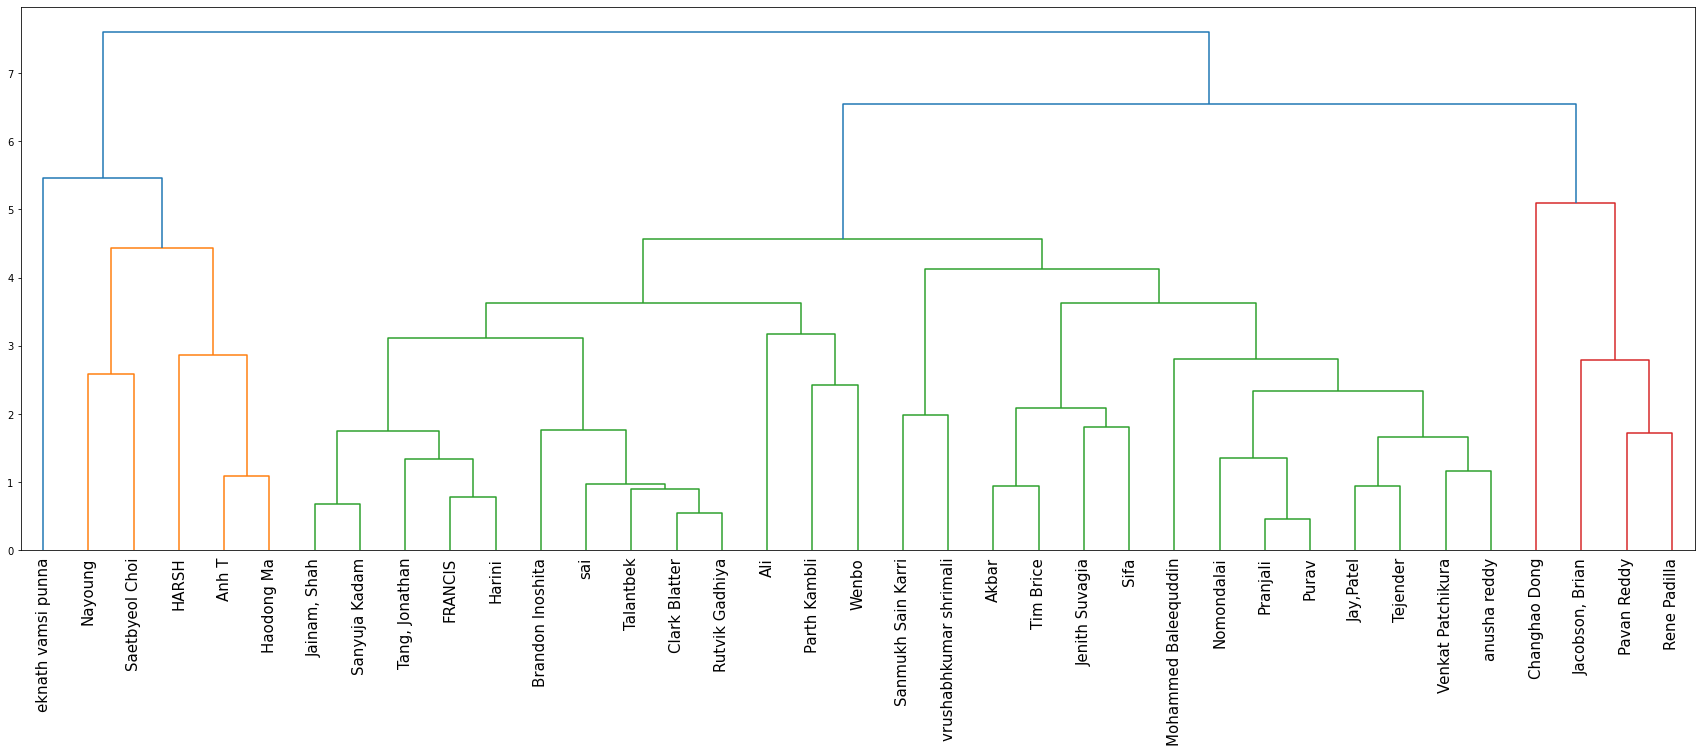

In [20]:
din3 = mov[["Mystery", "Documentary", "Animated"]]
Z = linkage(din3, 'average')
plt.figure(figsize = (30, 10))
D = dendrogram(Z = Z, orientation = "top",leaf_rotation = 90, leaf_font_size = 15, labels = din3.index)

* Here we used elbow method to confirm the number of cluster and we can see that number of cluster k = 4 below with the graph ploted.

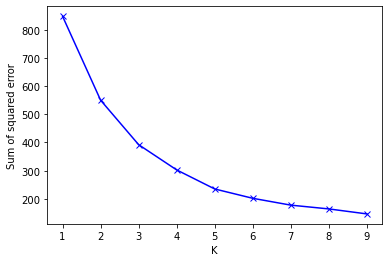

In [21]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters = k)
    km2.fit(din1)
    sse.append(km2.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, 'bx-')

-----------
# 4) Step-by-step Kmeans
--------------

* As we found out the total cluster k = 4. we will perform k-means below on the subset we created above.


In [22]:
model = KMeans(n_clusters = 4)
model.fit(din1)

KMeans(n_clusters=4)

In [23]:
din1['clusters'] = model.labels_

* Here I have ploted the pairplot to observe the cluster formed by all the columns of the dataframe.

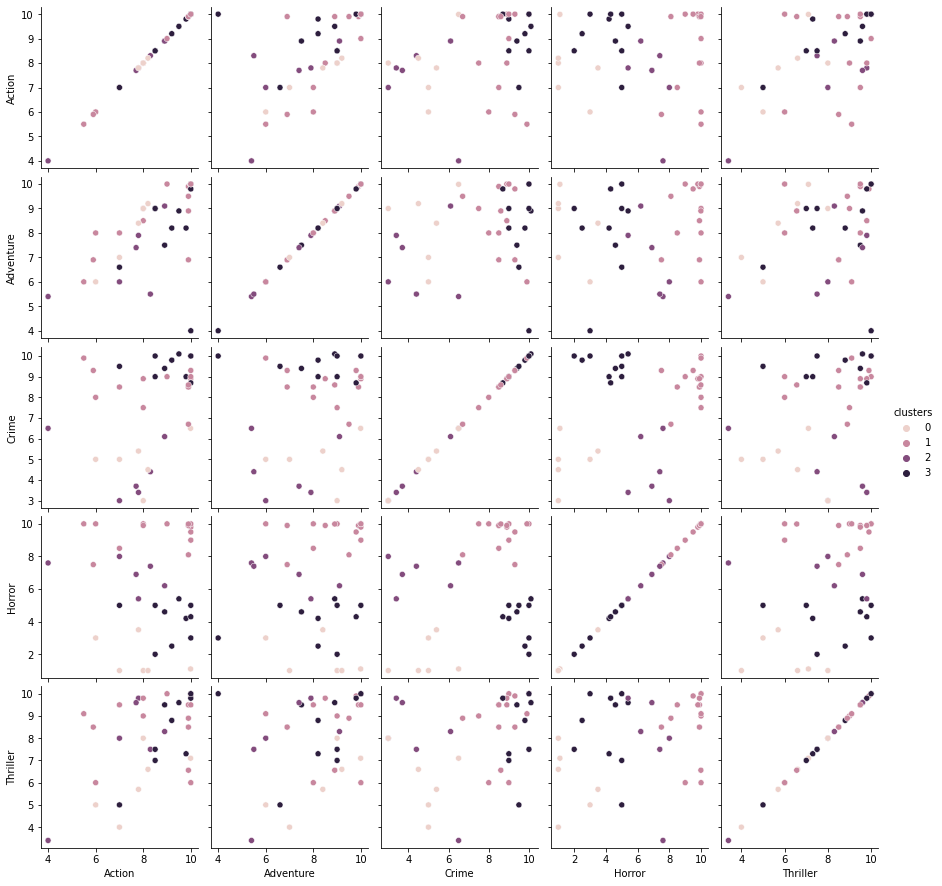

In [24]:
sns.pairplot(data = din1, hue = 'clusters' , diag_kind = None)

In [25]:
centroids = model.cluster_centers_

- Here we perfromed PCA to get perform kmeans over the multiple columns of the dataframe.

In [26]:
pca_num_components = 2
reduced_data = PCA(n_components = pca_num_components).fit_transform(din1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

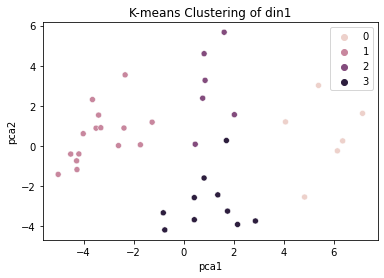

In [27]:

sns.scatterplot(x='pca1', y="pca2", hue = model.labels_, data = results)
plt.title('K-means Clustering of din1')
plt.show()

* Now we will use the eblow method to see the cluster between the columns of action movies rating and horror movies.
* We found k = 4

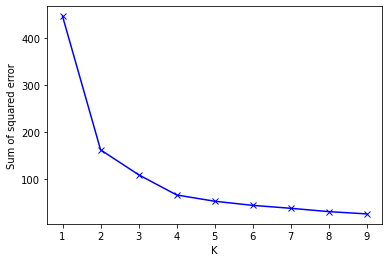

In [28]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters = k)
    km2.fit(din1[['Action','Horror']])
    sse.append(km2.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, 'bx-')

* Here we ploted scatter plot between action and horror movies rating to find the distribution of the cluster.

Text(0, 0.5, 'Horror')

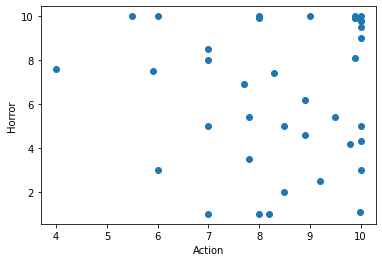

In [29]:
plt.scatter(mov.Action, mov.Horror)
plt.xlabel('Action')
plt.ylabel('Horror')

* Here we used `kmeans()` function to with k = 4 make the model.

In [30]:
model1 = KMeans(n_clusters=4) 
y_predicted = model1.fit_predict(din1[['Action','Horror']])
y_predicted

array([1, 2, 0, 0, 3, 0, 3, 2, 3, 0, 3, 1, 0, 1, 1, 2, 1, 0, 3, 1, 1, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 3, 0, 2, 1])

In [31]:
model1.cluster_centers_

array([[8.76363636, 5.4       ],
       [9.50909091, 9.64454545],
       [8.29888889, 2.01111111],
       [5.9       , 8.6       ]])

- Here we added a cluster columns to the subset of the dataframe.

In [32]:
din1['cluster'] = y_predicted
din1[['Action','Horror','cluster']].head()

,Action,Horror,cluster
Name,,,
Akbar,9.9,9.9,1
Ali,6.0,3.0,2
Anh T,8.9,4.6,0
Brandon Inoshita,8.9,6.2,0
Changhao Dong,4.0,7.6,3


* Here we plotted the scatter plot with clusters of the between Action and horror movie rating with their repective centroids.

Inertia of Kmeans with 2 Clusters:  65.68979595959597


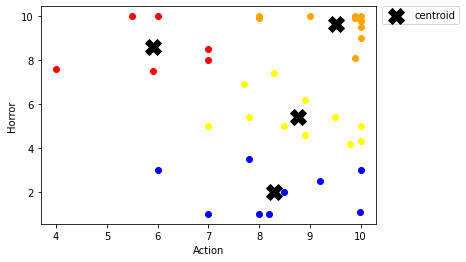

In [33]:
#Visualize Kmeans with 4 clusters
df1 = din1[din1.cluster==0]
df2 = din1[din1.cluster==1]
df3 = din1[din1.cluster==2]
df4 = din1[din1.cluster==3]
plt.scatter(df1['Action'],df1['Horror'],color='yellow')
plt.scatter(df2['Action'],df2['Horror'],color='orange')
plt.scatter(df3['Action'],df3['Horror'],color='blue')
plt.scatter(df4['Action'],df4['Horror'],color='red')
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],color='black',
            marker='X',s=250, label='centroid',)
plt.xlabel('Action')
plt.ylabel('Horror')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
din1["Action"],din1["Horror"]
print("Inertia of Kmeans with 2 Clusters: ", model1.inertia_)

--------
# 5) sklearn.cluster
----------
* Now I will use sklearn.cluster library to prefrom unsupervised clustering.

In [34]:
df = din1[["Action", "Horror"]]
sk = cluster.KMeans(n_clusters=4, init = "k-means++").fit(df)
sk = sk.fit(df[["Action", "Horror"]])

In [35]:
center = sk.cluster_centers_
center

array([[9.50909091, 9.64454545],
       [8.29888889, 2.01111111],
       [5.9       , 8.6       ],
       [8.76363636, 5.4       ]])

* Here we plotted the scatter plot between the action and horror movies by the differiating it with the students.

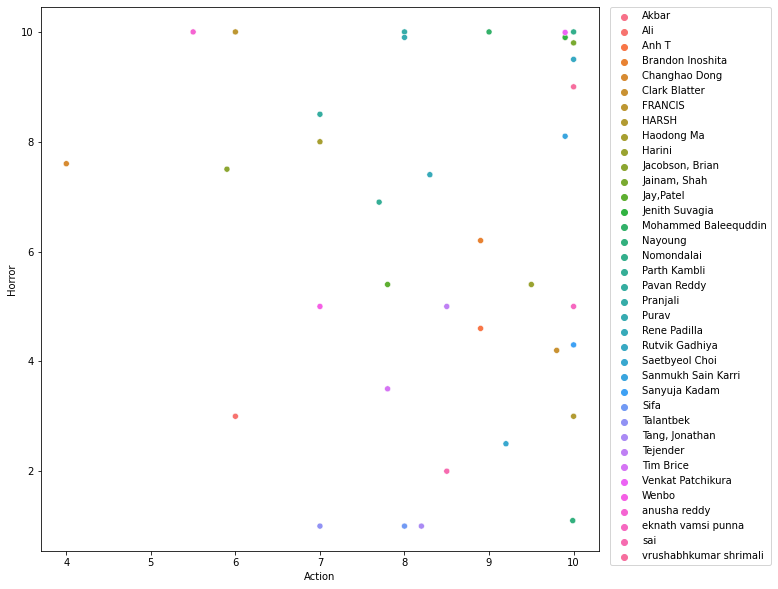

In [36]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = "Action", y = "Horror", hue = mov.index ,  data = df);
sns.color_palette('rainbow')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

--------
# 6) Prediction
-------
* Now I used TfidfVectorizer library to get different cluster of the columns Adjective and to predict the copuns of the new students.

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(mov.Adjective)
k = 4

model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100000, n_init = 1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 capable
 reliable
 free
 intelligent
 strong
 independent
 persistant
 resourceful
 positive
 thoughtful
Cluster 1:
 happy
 sociable
 slow
 funny
 friendly
 capable
 fast
 relaxed
 dedicated
 joking
Cluster 2:
 kind
 honest
 hard
 friendly
 direct
 true
 indisciplined
 easygoing
 trustworthy
 fun
Cluster 3:
 friendly
 social
 brave
 active
 emotional
 fast
 helpful
 proud
 cool
 interesting


Prediction


* How I created model to predict by entering the adjectives of the columns and give their repective coupons with their charateristics.

In [39]:
m_p = mov[["Movie_preferred", "Movie_preferred", "Movie_preferred"]]

A1 = str(input('Your Character: ' ))
A2 = str(input('Your Character: ' )) 
A3 = str(input('Your Character: ' )) 
Y = vectorizer.transform([A1, A2, A3])
prediction = model.predict(Y)
m_p[prediction]

Your Character: calm
Your Character: friendly
Your Character: honest


KeyError: "None of [Int64Index([0, 3, 2], dtype='int64')] are in the [columns]"

* Here I tried to create a model but was unsucceful to create it. I am learning new ideas to create it.

----------
# 7) Summary
---------
* I first explored the data and cleaned it by removing unwanted columns and rows like null values and extra data which I dont need in the further analysis and then I created a subset.
- Then with the help of the subset I created a dendogram to observe total number of cluster and confirmed the number of cluster with the help of the elbow method and we found out that total number of cluster k = 4. 
- Then we did the kmeans cluster over the subset we created and ploted a scatter plot of the clusters of the subsets and their centroids. Then I plotted the scatter plot between the action and horror movies by the differiating it with the students.
- Then I created a model to predict a movie coupon with the characteristic of the students but I failed to create a model.
----------
### Recommendation
-------
- Here I wasn't successful with the model so I can't predict the model.
- But apart from the prediction part I can surely recommended student with characteristic of brave, fearless can we given the action and horror movie coupon.